In [ ]:
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from imblearn.over_sampling import RandomOverSampler

# Load and preprocess the data
X = []
y = []
image_size = 150

healthy_folder = '/content/drive/MyDrive/PROJECT1/healthycows'
diseased_folder = '/content/drive/MyDrive/PROJECT1/lumpycows'

for img_name in os.listdir(healthy_folder):
    img = cv2.imread(os.path.join(healthy_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img)  # Do not flatten for CNN
    y.append(0)  # 0 for healthy

for img_name in os.listdir(diseased_folder):
    img = cv2.imread(os.path.join(diseased_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img)  # Do not flatten for CNN
    y.append(1)  # 1 for diseased

X = np.array(X)
y = np.array(y)

# Shuffle the data
X, y = shuffle(X, y, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
X_train_resampled, y_train_resampled = RandomOverSampler().fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape back to 4D for CNN
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], image_size, image_size, 3)

# Train the CNN model
history = model.fit(datagen.flow(X_train_resampled, y_train_resampled, batch_size=32),
                    steps_per_epoch=len(X_train_resampled) // 32,
                    epochs=20,
                    validation_data=(X_test, y_test))


Epoch 1/20
28/28 [==============================] - 58s 2s/step - loss: 61.5216 - accuracy: 0.5112 - val_loss: 0.7048 - val_accuracy: 0.5319
Epoch 2/20
28/28 [==============================] - 51s 2s/step - loss: 0.6855 - accuracy: 0.5503 - val_loss: 0.6613 - val_accuracy: 0.6702
Epoch 3/20
28/28 [==============================] - 50s 2s/step - loss: 0.6774 - accuracy: 0.5817 - val_loss: 0.6141 - val_accuracy: 0.6277
Epoch 4/20
28/28 [==============================] - 48s 2s/step - loss: 0.6845 - accuracy: 0.5940 - val_loss: 0.5987 - val_accuracy: 0.7234
Epoch 5/20
28/28 [==============================] - 47s 2s/step - loss: 0.6639 - accuracy: 0.5859 - val_loss: 0.5824 - val_accuracy: 0.7021
Epoch 6/20
28/28 [==============================] - 47s 2s/step - loss: 0.6555 - accuracy: 0.6152 - val_loss: 0.5921 - val_accuracy: 0.6915
Epoch 7/20
28/28 [==============================] - 47s 2s/step - loss: 0.6440 - accuracy: 0.6521 - val_loss: 0.5633 - val_accuracy: 0.7128
Epoch 8/20
28/28 [=

3/3 [==============================] - 2s 645ms/step
Accuracy: 0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        52
           1       0.66      0.90      0.76        42

    accuracy                           0.74        94
   macro avg       0.77      0.76      0.74        94
weighted avg       0.78      0.74      0.74        94

Confusion Matrix:
 [[32 20]
 [ 4 38]]


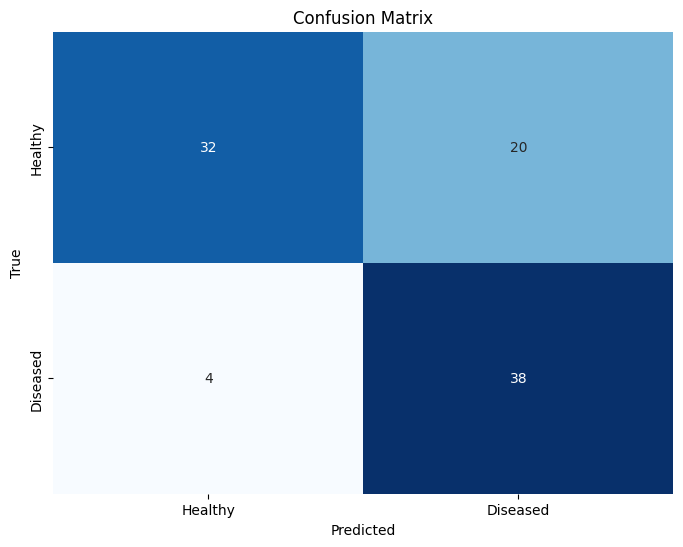

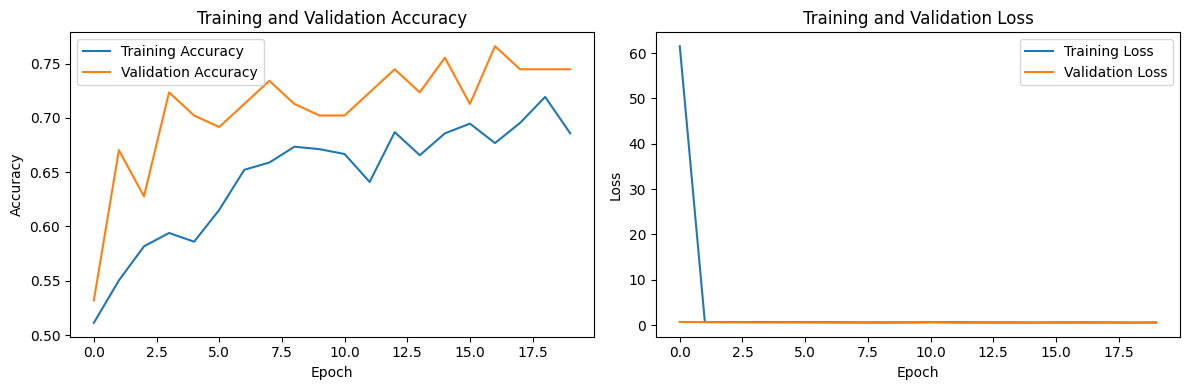

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load the image from Google or any other source
image_path = "/content/drive/MyDrive/img1009.jpg"  # Replace with the path to your image
img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))  # Resize the image to match the model's expected sizing
img = np.reshape(img, [1, 150, 150, 3])  # Reshape for prediction

# Make the prediction
prediction = model.predict(img)

# Convert the prediction to binary (0 or 1)
binary_prediction = (prediction > 0.5).astype("int32")

# Display the result
if binary_prediction[0][0] == 1:
    print("The image is predicted to be infected.")
else:
    print("The image is predicted to be healthy.")


1/1 [==============================] - 0s 84ms/step
The image is predicted to be infected.


In [ ]:
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from imblearn.over_sampling import RandomOverSampler

# Load and preprocess the data
X = []
y = []
image_size = 150

healthy_folder = '/content/drive/MyDrive/PROJECT1/healthycows'
diseased_folder = '/content/drive/MyDrive/PROJECT1/lumpycows'

for img_name in os.listdir(healthy_folder):
    img = cv2.imread(os.path.join(healthy_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img)  # Do not flatten for CNN
    y.append(0)  # 0 for healthy

for img_name in os.listdir(diseased_folder):
    img = cv2.imread(os.path.join(diseased_folder, img_name))
    if image_size:
        img = cv2.resize(img, (image_size, image_size))
    X.append(img)  # Do not flatten for CNN
    y.append(1)  # 1 for diseased

X = np.array(X)
y = np.array(y)

# Shuffle the data
X, y = shuffle(X, y, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
X_train_resampled, y_train_resampled = RandomOverSampler().fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape back to 4D for CNN
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], image_size, image_size, 3)

# Train the CNN model
history = model.fit(datagen.flow(X_train_resampled, y_train_resampled, batch_size=32),
                    steps_per_epoch=len(X_train_resampled) // 32,
                    epochs=30,
                    validation_data=(X_test, y_test))


Epoch 1/30
28/28 [==============================] - 48s 2s/step - loss: 24.6758 - accuracy: 0.4944 - val_loss: 0.6454 - val_accuracy: 0.5957
Epoch 2/30
28/28 [==============================] - 48s 2s/step - loss: 0.6833 - accuracy: 0.5794 - val_loss: 0.6875 - val_accuracy: 0.6170
Epoch 3/30
28/28 [==============================] - 46s 2s/step - loss: 0.6902 - accuracy: 0.5671 - val_loss: 0.6992 - val_accuracy: 0.4681
Epoch 4/30
28/28 [==============================] - 47s 2s/step - loss: 0.6769 - accuracy: 0.5962 - val_loss: 0.6473 - val_accuracy: 0.6489
Epoch 5/30
28/28 [==============================] - 47s 2s/step - loss: 0.6823 - accuracy: 0.5761 - val_loss: 0.6726 - val_accuracy: 0.6383
Epoch 6/30
28/28 [==============================] - 47s 2s/step - loss: 0.6895 - accuracy: 0.5391 - val_loss: 0.6733 - val_accuracy: 0.6064
Epoch 7/30
28/28 [==============================] - 51s 2s/step - loss: 0.6810 - accuracy: 0.5962 - val_loss: 0.6817 - val_accuracy: 0.5745
Epoch 8/30
28/28 [=

3/3 [==============================] - 1s 362ms/step
Accuracy: 0.6595744680851063
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.62      0.67        52
           1       0.60      0.71      0.65        42

    accuracy                           0.66        94
   macro avg       0.66      0.66      0.66        94
weighted avg       0.67      0.66      0.66        94

Confusion Matrix:
 [[32 20]
 [12 30]]


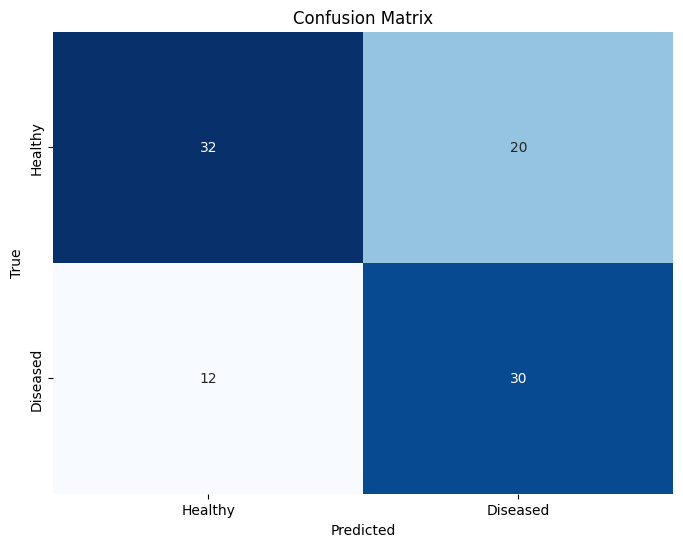

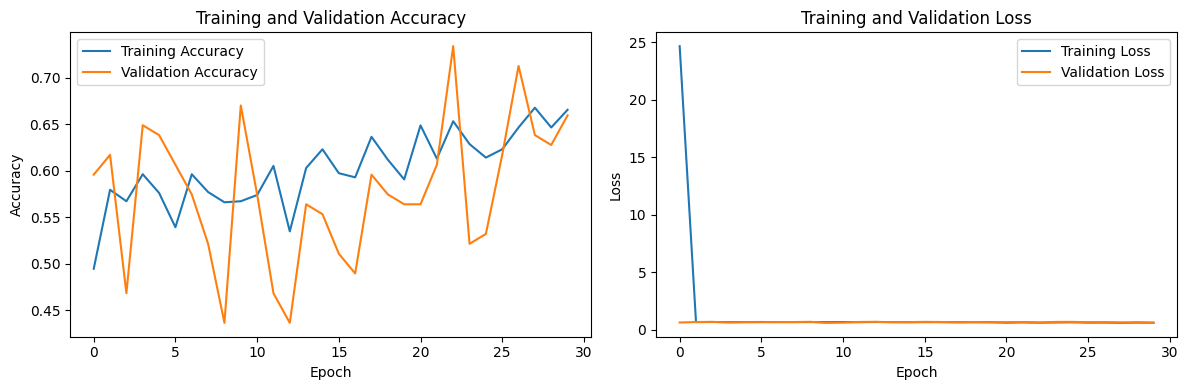

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()